In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import percentile
sns.set_style("whitegrid")
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score,StratifiedKFold, learning_curve
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict

In [3]:
df = pd.read_csv('salary.csv')
df

age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spouse     Exec-managerial         Husband   White   
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
...                    ...                 ...             ...     ...   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   
32559        Never-married        Adm-clerical       Own-child   White   
32560   Married-civ-spouse     Exec-managerial            Wife   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
0         Male          2174             0              40   United-States   
1         Male             0             0              13   United-States   
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
...        ...           ...           ...             ...             ...   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   
32559     Male             0             0              20   United-States   
32560   Female         15024             0              40   United-States   

       salary  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32556   <=50K  
32557    >50K  
32558   <=50K  
32559   <=50K  
32560    >50K  

[32561 rows x 15 columns]

In [4]:
counts = df.nunique()
counts

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
#Outlier Identification and Removal
def remove_outlier_IQR(df):
    num_columns = [x for x in df.columns if df[x].dtype != object]
    reduced_df = df[num_columns]
    Q1 = reduced_df.quantile(0.25)
    Q3 = reduced_df.quantile(0.75)
    IQR = Q3 - Q1
    # Creating a boolean mask for outliers
    outlier_mask = ((reduced_df < (Q1 - 1.5 * IQR)) | (reduced_df > (Q3 + 1.5 * IQR))).any(axis=1)
    # Filtering the DataFrame and returning
    df_filtered = df[~outlier_mask]
    return df_filtered


In [7]:
df= remove_outlier_IQR(df)
df

age          workclass  fnlwgt      education  education-num  \
2       38            Private  215646        HS-grad              9   
3       53            Private  234721           11th              7   
4       28            Private  338409      Bachelors             13   
5       37            Private  284582        Masters             14   
7       52   Self-emp-not-inc  209642        HS-grad              9   
...    ...                ...     ...            ...            ...   
32554   53            Private  321865        Masters             14   
32555   22            Private  310152   Some-college             10   
32556   27            Private  257302     Assoc-acdm             12   
32557   40            Private  154374        HS-grad              9   
32558   58            Private  151910        HS-grad              9   

            marital-status          occupation    relationship    race  \
2                 Divorced   Handlers-cleaners   Not-in-family   White   
3       Married-civ-spouse   Handlers-cleaners         Husband   Black   
4       Married-civ-spouse      Prof-specialty            Wife   Black   
5       Married-civ-spouse     Exec-managerial            Wife   White   
7       Married-civ-spouse     Exec-managerial         Husband   White   
...                    ...                 ...             ...     ...   
32554   Married-civ-spouse     Exec-managerial         Husband   White   
32555        Never-married     Protective-serv   Not-in-family   White   
32556   Married-civ-spouse        Tech-support            Wife   White   
32557   Married-civ-spouse   Machine-op-inspct         Husband   White   
32558              Widowed        Adm-clerical       Unmarried   White   

           sex  capital-gain  capital-loss  hours-per-week  native-country  \
2         Male             0             0              40   United-States   
3         Male             0             0              40   United-States   
4       Female             0             0              40            Cuba   
5       Female             0             0              40   United-States   
7         Male             0             0              45   United-States   
...        ...           ...           ...             ...             ...   
32554     Male             0             0              40   United-States   
32555     Male             0             0              40   United-States   
32556   Female             0             0              38   United-States   
32557     Male             0             0              40   United-States   
32558   Female             0             0              40   United-States   

       salary  
2       <=50K  
3       <=50K  
4       <=50K  
5       <=50K  
7        >50K  
...       ...  
32554    >50K  
32555   <=50K  
32556   <=50K  
32557    >50K  
32558   <=50K  

[18983 rows x 15 columns]

In [8]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [9]:
#Exploraty Data Analysis

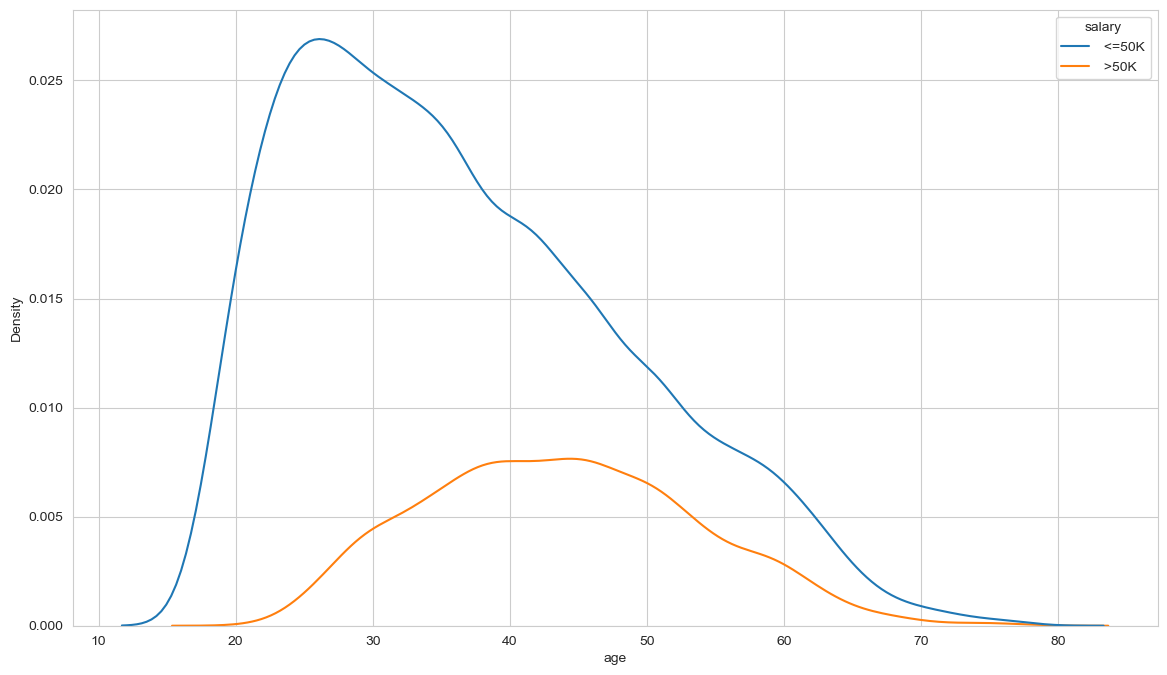

In [10]:
plt.figure(figsize=(14,8))
sns.kdeplot(data = df , x = 'age' ,hue='salary')
plt.show()

In [11]:
df_old = df[(df.age >= 40)&(df['hours-per-week'] >=50)]
df_old

age          workclass  fnlwgt      education  education-num  \
68      49       Self-emp-inc  191681   Some-college             10   
89      43        Federal-gov  410867      Doctorate             16   
102     47   Self-emp-not-inc  149116        Masters             14   
115     53            Private   95647            9th              5   
116     56       Self-emp-inc  303090   Some-college             10   
...    ...                ...     ...            ...            ...   
32449   44       Self-emp-inc   71556        Masters             14   
32492   42   Self-emp-not-inc  217597        HS-grad              9   
32504   50            Private  208630        Masters             14   
32533   54            Private  337992      Bachelors             13   
32550   43   Self-emp-not-inc   27242   Some-college             10   

            marital-status          occupation    relationship  \
68      Married-civ-spouse     Exec-managerial         Husband   
89           Never-married      Prof-specialty   Not-in-family   
102          Never-married      Prof-specialty   Not-in-family   
115     Married-civ-spouse   Handlers-cleaners         Husband   
116     Married-civ-spouse               Sales         Husband   
...                    ...                 ...             ...   
32449   Married-civ-spouse               Sales         Husband   
32492             Divorced               Sales       Own-child   
32504             Divorced               Sales   Not-in-family   
32533   Married-civ-spouse     Exec-managerial         Husband   
32550   Married-civ-spouse        Craft-repair         Husband   

                      race      sex  capital-gain  capital-loss  \
68                   White     Male             0             0   
89                   White   Female             0             0   
102                  White   Female             0             0   
115                  White     Male             0             0   
116                  White     Male             0             0   
...                    ...      ...           ...           ...   
32449                White     Male             0             0   
32492                White     Male             0             0   
32504                White   Female             0             0   
32533   Asian-Pac-Islander     Male             0             0   
32550                White     Male             0             0   

       hours-per-week  native-country  salary  
68                 50   United-States    >50K  
89                 50   United-States    >50K  
102                50   United-States   <=50K  
115                50   United-States   <=50K  
116                50   United-States   <=50K  
...               ...             ...     ...  
32449              50               ?    >50K  
32492              50               ?   <=50K  
32504              50   United-States    >50K  
32533              50           Japan    >50K  
32550              50   United-States   <=50K  

[1003 rows x 15 columns]

In [12]:
df.replace(' ?' , np.nan ,inplace=True)
df.isna().sum()

age                 0
workclass         749
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        751
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    326
salary              0
dtype: int64

In [13]:
import pandas as pd

# Filling missing values
df['occupation'] = df['occupation'].fillna(value='Other-service')
df['native-country'] = df['native-country'].fillna(value='Other-country')
df['workclass'] = df['workclass'].fillna(value='Other')

# Drop rows based on df_old index
df = df[~df.index.isin(df_old.index)]


In [14]:
df_young = df[(df.age <=30)&(df['salary'] ==' >50K')]
df_young

age      workclass  fnlwgt      education  education-num  \
11      30      State-gov  141297      Bachelors             13   
123     29      State-gov  267989      Bachelors             13   
174     28      State-gov  149624      Bachelors             13   
575     29        Private  350162      Bachelors             13   
633     30        Private  103649      Bachelors             13   
...    ...            ...     ...            ...            ...   
31588   28        Private  142712      Bachelors             13   
31794   30   Self-emp-inc  204470   Some-college             10   
31918   26        Private  154571   Some-college             10   
32199   27        Private  100669   Some-college             10   
32236   26        Private  323044   Some-college             10   

            marital-status          occupation    relationship  \
11      Married-civ-spouse      Prof-specialty         Husband   
123     Married-civ-spouse      Prof-specialty         Husband   
174     Married-civ-spouse      Prof-specialty         Husband   
575     Married-civ-spouse     Exec-managerial            Wife   
633     Married-civ-spouse        Adm-clerical            Wife   
...                    ...                 ...             ...   
31588        Never-married     Exec-managerial   Not-in-family   
31794   Married-civ-spouse     Exec-managerial         Husband   
31918        Never-married   Machine-op-inspct   Not-in-family   
32199   Married-civ-spouse        Craft-repair         Husband   
32236   Married-civ-spouse     Exec-managerial         Husband   

                      race      sex  capital-gain  capital-loss  \
11      Asian-Pac-Islander     Male             0             0   
123                  White     Male             0             0   
174                  White     Male             0             0   
575                  White     Male             0             0   
633                  Black   Female             0             0   
...                    ...      ...           ...           ...   
31588                White     Male             0             0   
31794                White     Male             0             0   
31918   Asian-Pac-Islander     Male             0             0   
32199   Asian-Pac-Islander     Male             0             0   
32236                White     Male             0             0   

       hours-per-week  native-country salary  
11                 40           India   >50K  
123                50   United-States   >50K  
174                40   United-States   >50K  
575                40   United-States   >50K  
633                40   United-States   >50K  
...               ...             ...    ...  
31588              50   United-States   >50K  
31794              36   United-States   >50K  
31918              45   United-States   >50K  
32199              40     Philippines   >50K  
32236              45         Germany   >50K  

[382 rows x 15 columns]

In [15]:
df.drop(df.loc[df_young.index].index,axis=0,inplace=True)

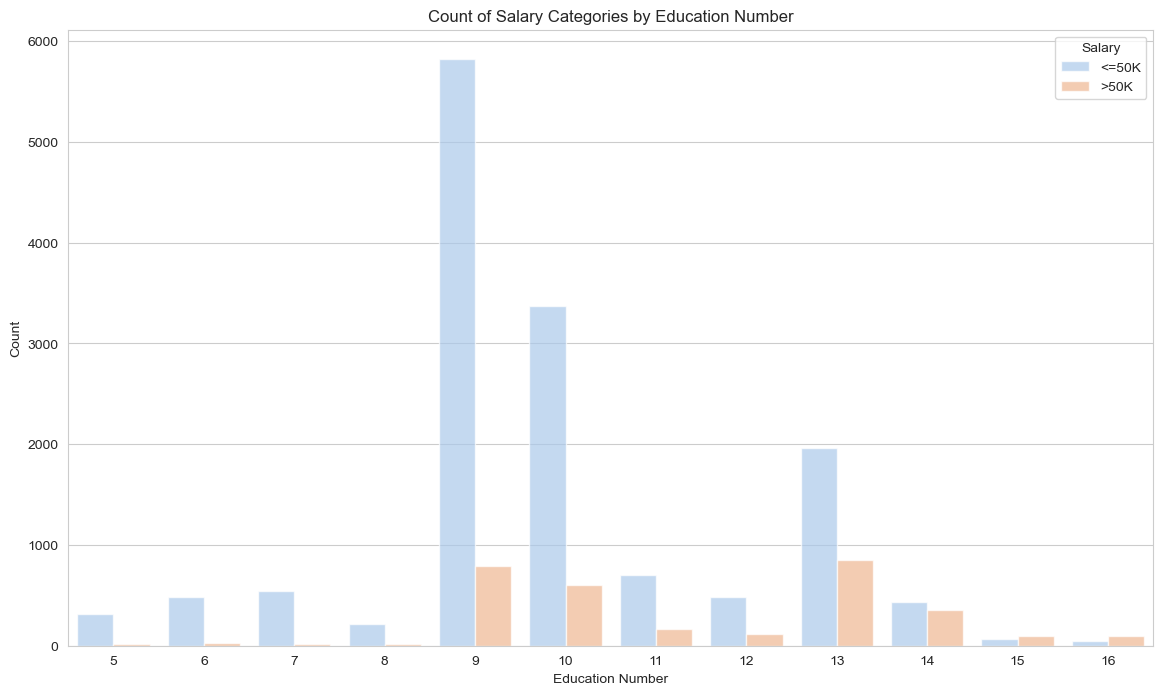

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='education-num', hue='salary', palette='pastel', alpha=0.7)
plt.legend(title='Salary', loc='upper right', labels=['<=50K', '>50K'])
plt.xlabel('Education Number')
plt.ylabel('Count')
plt.title('Count of Salary Categories by Education Number')
plt.show()


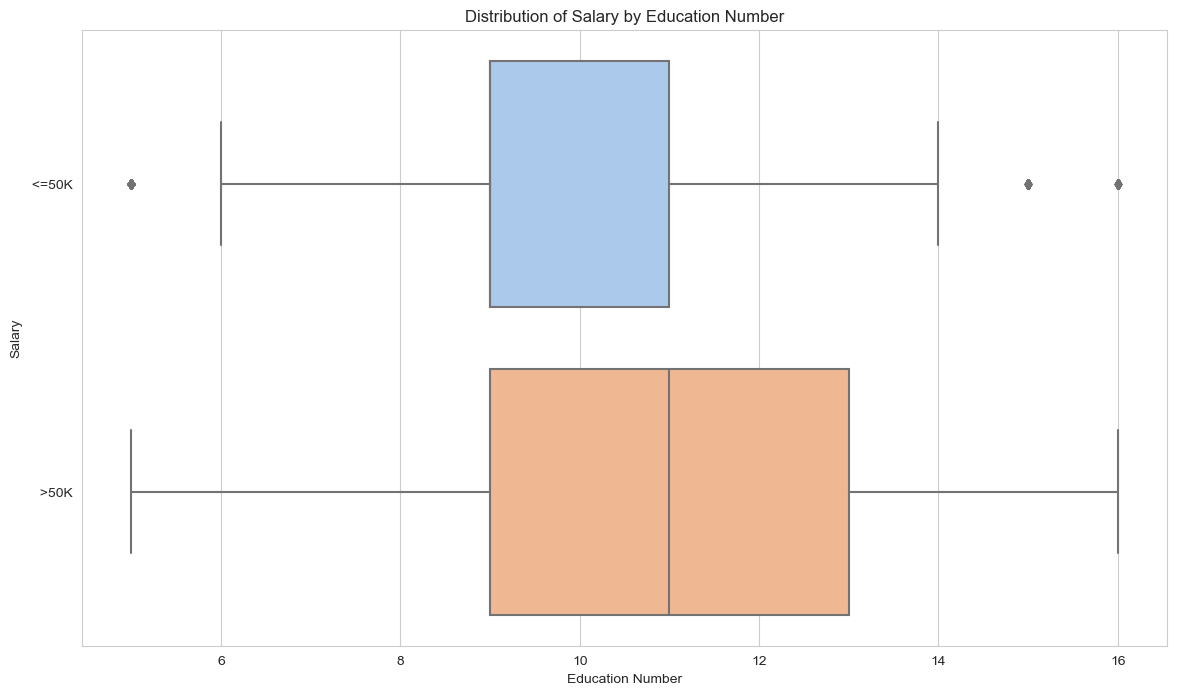

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='education-num', y='salary', palette='pastel')
plt.xlabel('Education Number')
plt.ylabel('Salary')
plt.title('Distribution of Salary by Education Number')
plt.show()


In [18]:
df_man_women=pd.get_dummies(df , columns=[  'salary'])
df_man_women=pd.pivot_table(df_man_women,  index='education-num',columns= 'sex',values=['salary_ <=50K' , 'salary_ >50K'],    
               aggfunc=np.sum).reset_index()
df_man_women['salary_ >50K'] = (df_man_women['salary_ >50K'] / (df_man_women['salary_ >50K']+ df_man_women['salary_ <=50K']))

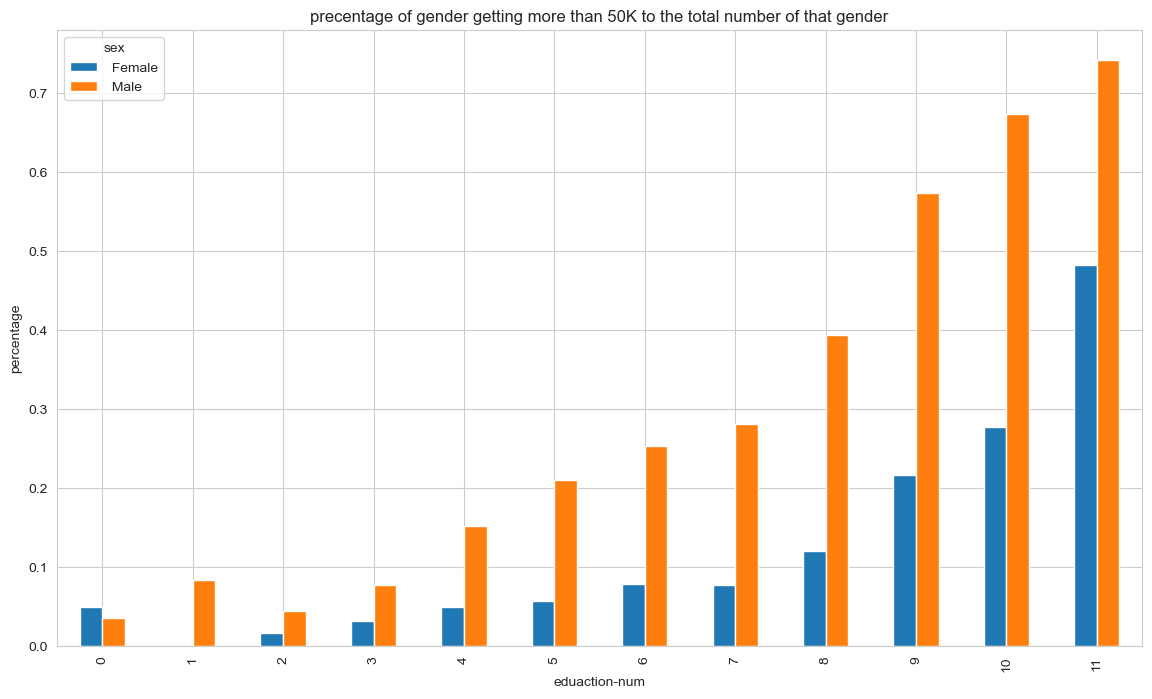

In [19]:
df_man_women['salary_ >50K'].plot(figsize=(14,8), kind = 'bar')
plt.title('precentage of gender getting more than 50K to the total number of that gender')
plt.xlabel('eduaction-num')
plt.ylabel('percentage')
plt.show()

In [20]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt
import plotly.graph_objects as go
import plotly.express as px

In [21]:
px.scatter_3d(df,x='age',y="sex",z="salary",color="salary")

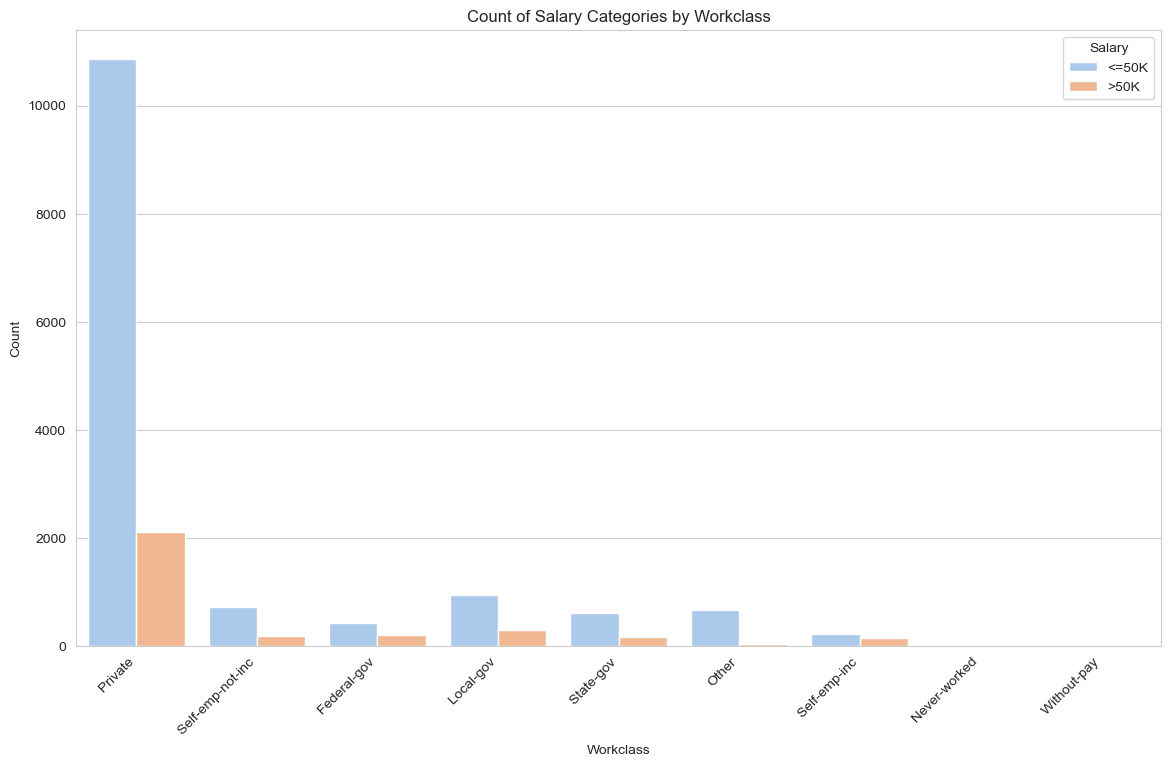

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='workclass', hue='salary', palette='pastel')
plt.title('Count of Salary Categories by Workclass')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.legend(title='Salary', loc='upper right', labels=['<=50K', '>50K'])
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame for individuals from the United States
df_usa = df[df['native-country'] == 'United-States']

# Check if the filtered DataFrame is empty
if df_usa.empty:
    print("No data available for individuals from the United States.")
else:
    plt.figure(figsize=(14, 8))
    sns.countplot(data=df_usa, x='race', hue='salary', palette='pastel')
    plt.title('Count of Salary Categories by Race (USA)')
    plt.xlabel('Race')
    plt.ylabel('Count')
    plt.legend(title='Salary', loc='upper right', labels=['<=50K', '>50K'])
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()


No data available for individuals from the United States.


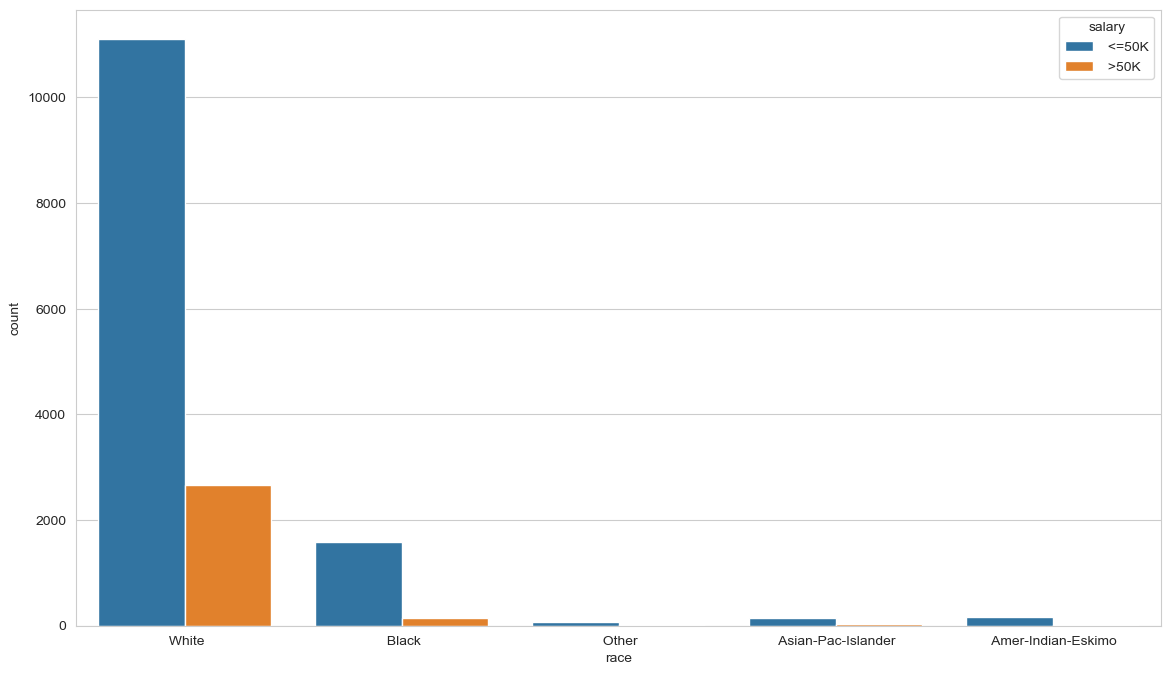

In [24]:
plt.figure(figsize=(14,8))
sns.countplot(data =df[df['native-country'] ==' United-States'] , x = 'race', hue = 'salary')
plt.show()

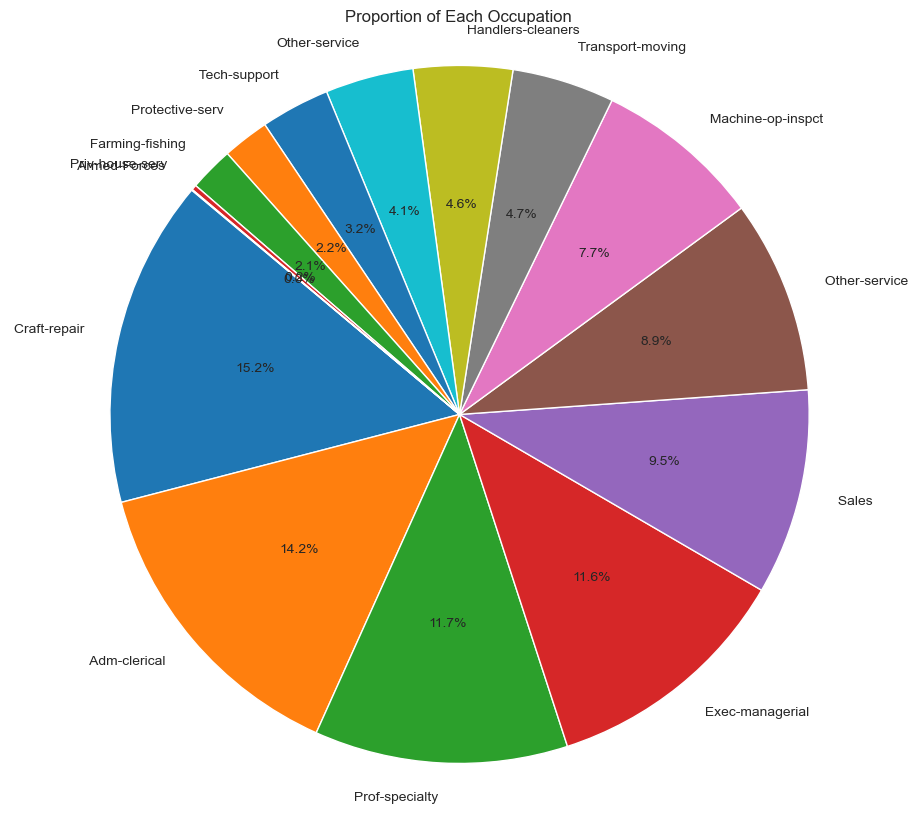

In [25]:
import matplotlib.pyplot as plt

occupation = df['occupation'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(occupation.values, labels=occupation.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Occupation')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [26]:
#Data Preprocessing

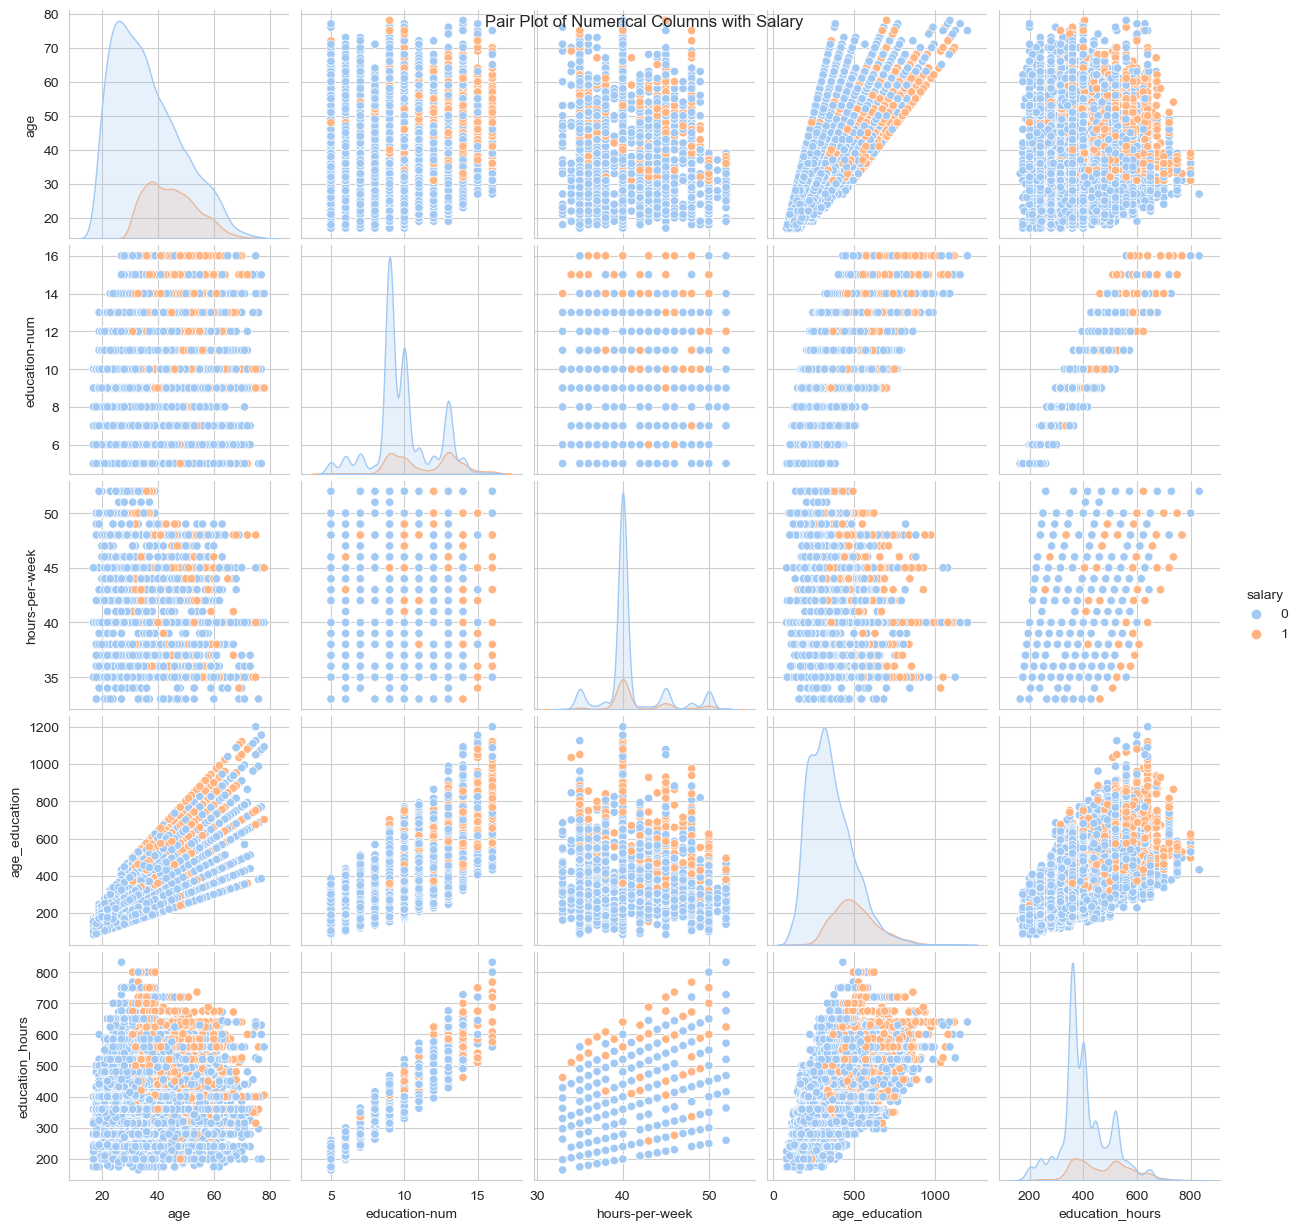

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'salary' column to binary labels
df['salary'] = df['salary'].map({' >50K': 1, ' <=50K': 0})

# Calculate additional features
df['age_education'] = df['age'] * df['education-num']
df['education_hours'] = df['education-num'] * df['hours-per-week']

# Select numerical columns for the pair plot
numerical_columns = ['age', 'education-num', 'hours-per-week', 'age_education', 'education_hours', 'salary']
df_numerical = df[numerical_columns]

# Create a pair plot
sns.pairplot(df_numerical, diag_kind='kde', hue='salary', palette='pastel')
plt.suptitle('Pair Plot of Numerical Columns with Salary')
plt.show()


In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

y = df['salary']
df.drop('salary', axis=1, inplace=True)

num_cols = df.select_dtypes(include='number').columns

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

print(df)


            age          workclass    fnlwgt      education  education-num  \
2      0.030519            Private  0.398036        HS-grad      -0.548665   
3      1.282423            Private  0.617335           11th      -1.493237   
4     -0.804084            Private  1.809400      Bachelors       1.340478   
5     -0.052942            Private  1.190570        Masters       1.812764   
7      1.198963   Self-emp-not-inc  0.329010        HS-grad      -0.548665   
...         ...                ...       ...            ...            ...   
32554  1.282423            Private  1.619200        Masters       1.812764   
32555 -1.304846            Private  1.484539   Some-college      -0.076379   
32556 -0.887545            Private  0.876941     Assoc-acdm       0.868192   
32557  0.197439            Private -0.306387        HS-grad      -0.548665   
32558  1.699725            Private -0.334715        HS-grad      -0.548665   

            marital-status          occupation    relationship 

In [29]:
df.drop('education' ,axis = 1 , inplace=True)

In [30]:
df['native-country'].value_counts()

 United-States                 15933
Other-country                    303
 Mexico                          224
 Philippines                     123
 Germany                          78
 Puerto-Rico                      65
 Canada                           60
 Jamaica                          58
 Cuba                             53
 India                            46
 England                          45
 China                            44
 Poland                           40
 El-Salvador                      40
 Vietnam                          38
 Dominican-Republic               38
 Italy                            36
 Columbia                         35
 South                            33
 Japan                            28
 Taiwan                           25
 Iran                             24
 Guatemala                        23
 Haiti                            22
 Portugal                         21
 Ireland                          16
 Peru                             14
 

In [31]:
import pandas as pd

# Preprocess the 'native-country' column by removing leading and trailing whitespaces
df['native-country'] = df['native-country'].str.strip()

# Get a list of categorical columns
cat_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to the categorical columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display the updated DataFrame
print(df)


            age    fnlwgt  education-num  capital-gain  capital-loss  \
2      0.030519  0.398036      -0.548665           0.0           0.0   
3      1.282423  0.617335      -1.493237           0.0           0.0   
4     -0.804084  1.809400       1.340478           0.0           0.0   
5     -0.052942  1.190570       1.812764           0.0           0.0   
7      1.198963  0.329010      -0.548665           0.0           0.0   
...         ...       ...            ...           ...           ...   
32554  1.282423  1.619200       1.812764           0.0           0.0   
32555 -1.304846  1.484539      -0.076379           0.0           0.0   
32556 -0.887545  0.876941       0.868192           0.0           0.0   
32557  0.197439 -0.306387      -0.548665           0.0           0.0   
32558  1.699725 -0.334715      -0.548665           0.0           0.0   

       hours-per-week  age_education  education_hours  workclass_ Local-gov  \
2           -0.275452      -0.277335        -0.584504   

In [32]:
#Split Dataset for Training and Testing 

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, shuffle=True, random_state=41)

# Display the shapes of the splits
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)


Shape of training feature: (14078, 86)
Shape of testing feature: (3520, 86)
Shape of training label: (14078,)
Shape of testing label: (3520,)


In [34]:
#Modeling 

In [41]:
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))

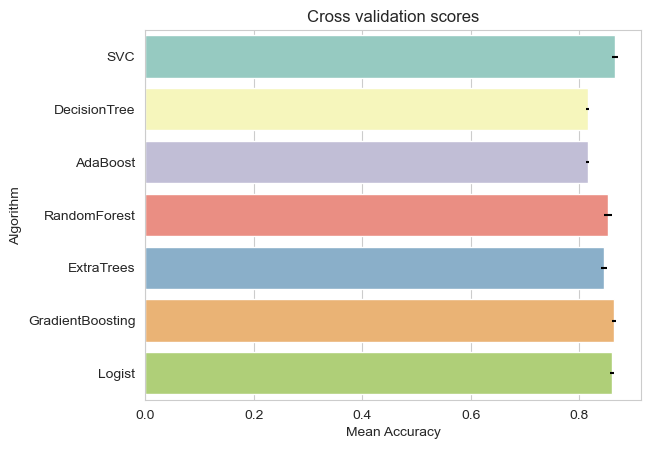

In [42]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier,X_train, y_train, scoring = "accuracy", cv =5, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors":cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","Logist"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res,palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [45]:
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
                'n_estimators' : [100,200,300],
                'learning_rate': [0.1, 0.05, 0.01],
                'max_depth': [4, 8],
                'min_samples_leaf': [100,150],
                'max_features': [0.3, 0.1]
}
gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsGBC.fit(X_train, y_train)
GBC_best = gsGBC.best_estimator_
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


0.8684473397384144

In [43]:
logC = LogisticRegression()
log_param_grid={'penalty':['l2','l1'] ,
                'dual':[True , False],
                'C':[0.01 , 0.1 , 1 , 1, 10 ]}
gslogC = GridSearchCV(logC,param_grid = log_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gslogC.fit(X_train, y_train)
logC_best = gslogC.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [46]:
RFC = RandomForestClassifier()
rf_param_grid = {"max_depth": [None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [False],
    "n_estimators" :[100,300],
    "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5,scoring="accuracy", n_jobs= 4, verbose = 1)
gsRFC.fit(X_train , y_train)
RFC_best = gsRFC.best_estimator_
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.8662450549006945

In [47]:
chosen_classifiers = [GBC_best, logC_best,RFC_best]

In [48]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[:,1]
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
             'auc': auc, 'cm': cm}


In [49]:
GBC_eval =  evaluate_model(GBC_best, X_test, y_test)
print('Accuracy:', GBC_eval['acc'])
print('Precision:', GBC_eval['prec'])
print('Recall:', GBC_eval['rec'])
print('F1 Score:', GBC_eval['f1'])
print('Area Under Curve:', GBC_eval['auc'])
print('Confusion Matrix:\n', GBC_eval['cm'])

Accuracy: 0.8673295454545454
Precision: 0.6645833333333333
Recall: 0.5104
F1 Score: 0.5773755656108597
Area Under Curve: 0.9144867702936098
Confusion Matrix:
 [[2734  161]
 [ 306  319]]


In [50]:
logC_best_eval =  evaluate_model(logC_best, X_test, y_test)
print('Accuracy:', logC_best_eval['acc'])
print('Precision:', logC_best_eval['prec'])
print('Recall:', logC_best_eval['rec'])
print('F1 Score:', logC_best_eval['f1'])
print('Area Under Curve:', logC_best_eval['auc'])
print('Confusion Matrix:\n', logC_best_eval['cm'])

Accuracy: 0.8610795454545455
Precision: 0.6471861471861472
Recall: 0.4784
F1 Score: 0.5501379944802208
Area Under Curve: 0.8974889119170985
Confusion Matrix:
 [[2732  163]
 [ 326  299]]


In [51]:
RFC_best_eval =  evaluate_model(RFC_best, X_test, y_test)
print('Accuracy:', RFC_best_eval['acc'])
print('Precision:', RFC_best_eval['prec'])
print('Recall:', RFC_best_eval['rec'])
print('F1 Score:', RFC_best_eval['f1'])
print('Area Under Curve:', RFC_best_eval['auc'])
print('Confusion Matrix:\n', RFC_best_eval['cm'])

Accuracy: 0.8664772727272727
Precision: 0.6710816777041942
Recall: 0.4864
F1 Score: 0.5640074211502784
Area Under Curve: 0.9093739550949914
Confusion Matrix:
 [[2746  149]
 [ 321  304]]


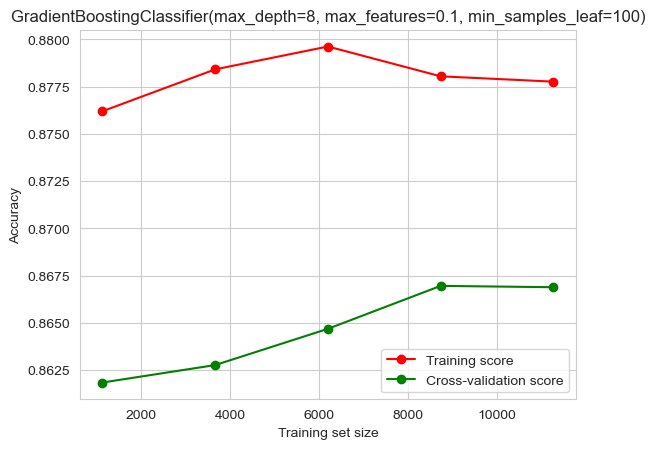

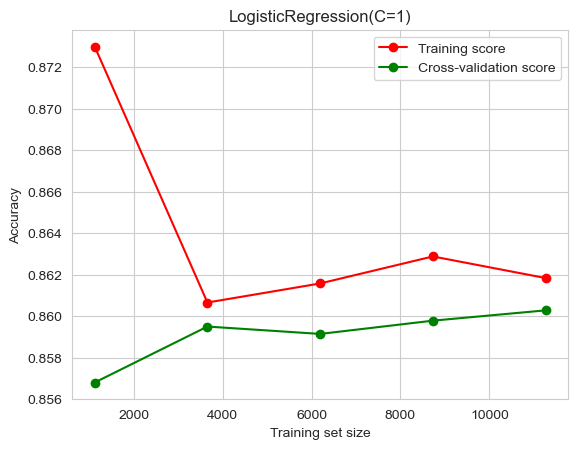

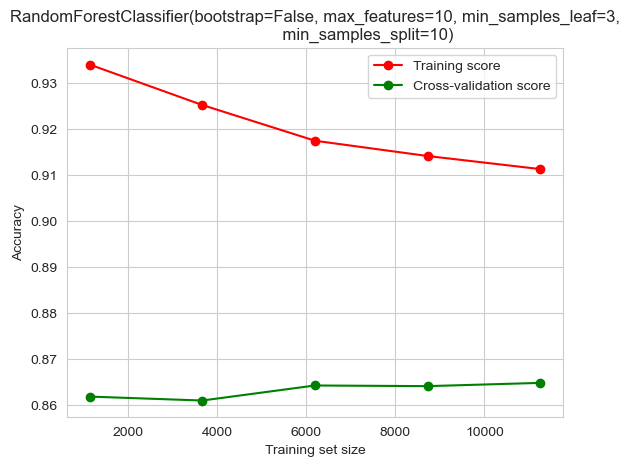

In [52]:
def plot_learning_curve(models , X , y):
        for model in models :
            train_sizes , train_scores , test_scores =learning_curve(model ,X , y , n_jobs=-1 )
            train_scores_mean = np.mean(train_scores ,axis = 1)
            test_scores_mean = np.mean(test_scores ,axis=1)
            plt.plot(train_sizes , train_scores_mean , 'o-' , color ='r' , label = 'Training score')
            plt.plot(train_sizes , test_scores_mean , 'o-' , color ='g' , label = 'Cross-validation score')
            plt.xlabel('Training set size')
            plt.ylabel('Accuracy')
            plt.legend()
            plt.title(model)
            plt.show()
plot_learning_curve(chosen_classifiers , X_train , y_train)
